The dataset was downloaded from http://insideairbnb.com/get-the-data/

In [2]:
#Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import HTML, display
import seaborn as sns;

In [3]:
ny = pdmain_df = pd.read_csv('listings.csv')
ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.29,2,0,0,NaN
1,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,2022-06-21,0.30,3,325,1,NaN
2,14991,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,2023-05-14,0.14,1,268,3,NaN
3,5136,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,2022-08-10,0.03,1,275,1,NaN
4,59709,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,2023-04-28,0.47,1,38,23,NaN


In [4]:
nycrim = pdmain_df = pd.read_csv('NYPD.csv')
nycrim.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,264551409,43.0,BRONX,3/4/2023,12:55:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,18-24,WHITE HISPANIC,M,1026061.0,239111.0,40.822882,-73.848929,"(40.822882, -73.848929)",POINT (-73.848929 40.822882)
1,268554247H1,NaN,STATEN ISLAND,5/19/2023,15:52:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,<18,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN
2,270383297,52.0,BRONX,6/24/2023,14:35:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,45-64,BLACK,F,1010975.0,255273.0,40.867300,-73.903374,"(40.8673, -73.903374)",POINT (-73.903374 40.8673)
3,267154459,32.0,MANHATTAN,4/1/2022,15:00:00,4/1/2023,15:00:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,999439.0,236537.0,40.815904,-73.945123,"(40.815904, -73.945123)",POINT (-73.945123 40.815904)
4,262715874,30.0,MANHATTAN,12/29/2022,0:00:00,1/29/2023,16:00:00,COMPLETED,(null),NaN,...,NaN,18-24,BLACK HISPANIC,F,999990.0,240313.0,40.826268,-73.943126,"(40.826268, -73.943126)",POINT (-73.943126 40.826268)


In [13]:
info(ny)

NameError: name 'info' is not defined

Seperate the dataset into categories based on the neighborhood the listing is in.

In [28]:
#doing some data exploration to see what might be of interest per neighborhood 
print(ny.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43566 entries, 0 to 43565
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43566 non-null  int64  
 1   name                            43566 non-null  object 
 2   host_id                         43566 non-null  int64  
 3   host_name                       43561 non-null  object 
 4   neighbourhood_group             43566 non-null  object 
 5   neighbourhood                   43566 non-null  object 
 6   latitude                        43566 non-null  float64
 7   longitude                       43566 non-null  float64
 8   room_type                       43566 non-null  object 
 9   price                           43566 non-null  int64  
 10  minimum_nights                  43566 non-null  int64  
 11  number_of_reviews               43566 non-null  int64  
 12  last_review                     

In [4]:
print(nycrim.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271717 entries, 0 to 271716
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                271717 non-null  object 
 1   ADDR_PCT_CD               271683 non-null  float64
 2   BORO_NM                   271717 non-null  object 
 3   CMPLNT_FR_DT              271717 non-null  object 
 4   CMPLNT_FR_TM              271717 non-null  object 
 5   CMPLNT_TO_DT              253642 non-null  object 
 6   CMPLNT_TO_TM              271717 non-null  object 
 7   CRM_ATPT_CPTD_CD          271717 non-null  object 
 8   HADEVELOPT                271717 non-null  object 
 9   HOUSING_PSA               17996 non-null   float64
 10  JURISDICTION_CODE         271717 non-null  int64  
 11  JURIS_DESC                271717 non-null  object 
 12  KY_CD                     271717 non-null  int64  
 13  LAW_CAT_CD                271717 non-null  o

In [29]:
#checking on what fields are null. Does not seem to be much of an issue, some people to not write a review when they are satisfied or have nothing to say, so Last Review and Reviews per Month being n/a is ok. The license field will not have an impact on my analysis.
(round(ny.isnull().sum() / ny.shape[0] * 100, 2)).sort_values(ascending=False)

license                           100.00
reviews_per_month                  24.09
last_review                        24.09
host_name                           0.01
minimum_nights                      0.00
number_of_reviews_ltm               0.00
availability_365                    0.00
calculated_host_listings_count      0.00
number_of_reviews                   0.00
id                                  0.00
name                                0.00
room_type                           0.00
longitude                           0.00
latitude                            0.00
neighbourhood                       0.00
neighbourhood_group                 0.00
host_id                             0.00
price                               0.00
dtype: float64

In [4]:
(round(nycrim.isnull().sum() / nycrim.shape[0] * 100, 2)).sort_values(ascending=False)

TRANSIT_DISTRICT            97.63
HOUSING_PSA                 93.38
CMPLNT_TO_DT                 6.65
PD_CD                        0.07
ADDR_PCT_CD                  0.01
Latitude                     0.00
Longitude                    0.00
Y_COORD_CD                   0.00
X_COORD_CD                   0.00
VIC_SEX                      0.00
PREM_TYP_DESC                0.00
VIC_RACE                     0.00
VIC_AGE_GROUP                0.00
Lat_Lon                      0.00
SUSP_SEX                     0.00
SUSP_RACE                    0.00
SUSP_AGE_GROUP               0.00
STATION_NAME                 0.00
RPT_DT                       0.00
CMPLNT_NUM                   0.00
PD_DESC                      0.00
PATROL_BORO                  0.00
PARKS_NM                     0.00
OFNS_DESC                    0.00
LOC_OF_OCCUR_DESC            0.00
LAW_CAT_CD                   0.00
KY_CD                        0.00
JURIS_DESC                   0.00
JURISDICTION_CODE            0.00
HADEVELOPT    

In [30]:
print("Neighbourhood Groups:", ny['neighbourhood_group'].unique().tolist())
print("Room Types:", ny['room_type'].unique().tolist())

Neighbourhood Groups: ['Brooklyn', 'Manhattan', 'Bronx', 'Queens', 'Staten Island']
Room Types: ['Private room', 'Entire home/apt', 'Hotel room', 'Shared room']


In [5]:
print('Neighborhood Groups:', nycrim['BORO_NM'].unique().tolist())

Neighborhood Groups: ['BRONX', 'STATEN ISLAND', 'MANHATTAN', 'BROOKLYN', 'QUEENS', '(null)']


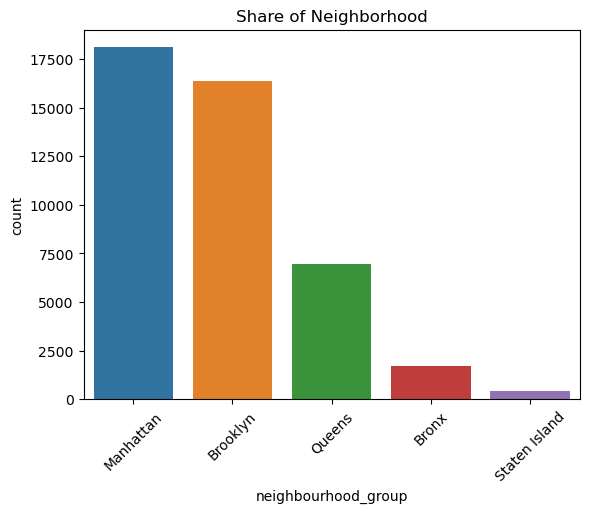

In [40]:
#Taking a closer look at the neighborhood catagories
#visualizing the number of Airbnbs in each borough

# Create a countplot using Seaborn
ax = sns.countplot(x='neighbourhood_group', data=ny, order=ny['neighbourhood_group'].value_counts().index)
ax.set_title('Share of Neighborhood')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.show()

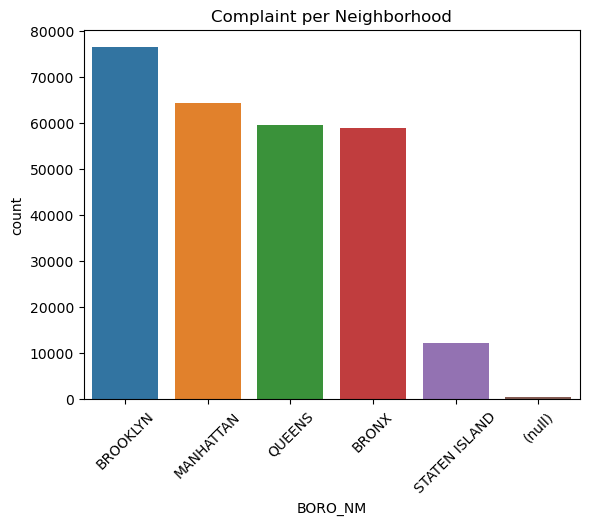

In [10]:
ax = sns.countplot(x='BORO_NM', data=nycrim, order=nycrim['BORO_NM'].value_counts().index)
ax.set_title('Complaint per Neighborhood')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.show()

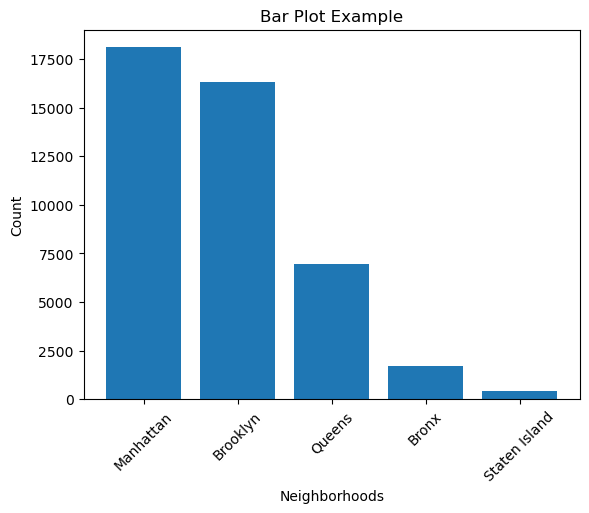

In [39]:
#During work on this project, I have learned more about the Seoborn plotting package and enhanced the below barplot by using it. 

value_counts = ny['neighbourhood_group'].value_counts()

plt.bar(value_counts.index, value_counts)
plt.xlabel('Neighborhoods')
plt.ylabel('Count')
plt.title('Bar Plot Example')
plt.xticks(rotation=45)
plt.show()

The barplots above give a good visual of how many Airbnbs are located in each of the negihborhoods of NYC. Manhattan and Brooklyn have a high amount, as popular tourist locations, and here is a steep drop off for Queens, Bronx, and Staten Island.

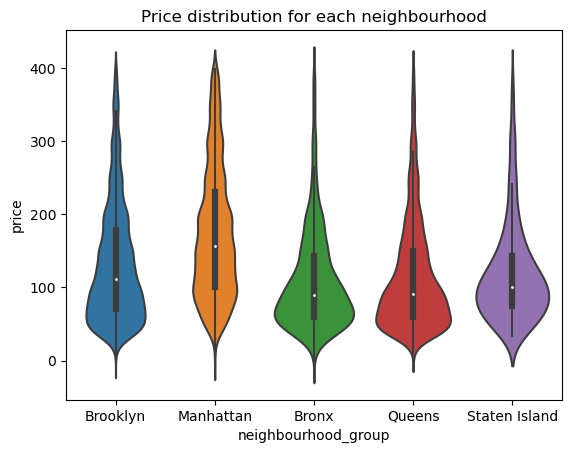

In [14]:
#Creating a violin plot to examine the price distribution for each neighborhood. In our final project we will be analyzing how crime data impacts these prices and availability.
winsorized_df=ny[ny.price < 400]

# using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=winsorized_df, x='neighbourhood_group', y='price')
viz_2.set_title('Price distribution for each neighbourhood')
plt.show()


The violin plot shoes the price distribution of each NYC neighborhood. It was interested to not how narrow the distribution of Manhattan's Airbnbs prices compared to Brooklyn. 

neighbourhood_group
Manhattan        307.32
Staten Island    286.74
Brooklyn         175.68
Queens           148.42
Bronx            126.87
Name: price, dtype: float64




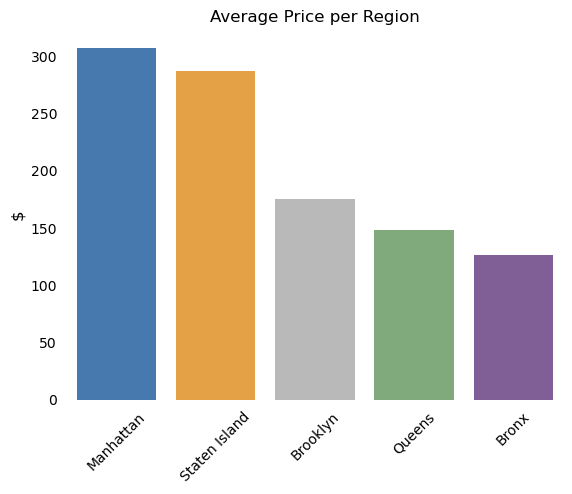

In [41]:
#Using Seaborn, again, to look at the average prices per neighborhood

# Calculating the average price per region
price_region = round(ny.groupby('neighbourhood_group').price.mean().sort_values(ascending=False), 2)

# Displaying the results
print(price_region)
print('\n')

# Define a color palette
colors = ["#3778bf", "#ffa52c", "#b9b9b9", "#7bb274", "#8256a0"]

# Create the bar plot using Seaborn
ax = sns.barplot(x=price_region.index, y=price_region.values, palette=colors)
ax.set_title('Average Price per Region')
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for key, spine in ax.spines.items():
    spine.set_visible(False)

plt.xticks(rotation=45)
plt.show()

The barplot of average price for Airbnbs by neighborhood gave interesting results that need more analysis. I believe that the prices for Staten Island Airbnb's may be high because there are large units or homes available compared to other areas in the city. 

In [ ]:
#bar graph with price of each neighborhood next to number of complaints from the NYPD data
